In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re

In [79]:
# Downloading HTML
url = "https://www.myprotein.es/c/nutrition/protein/"
response = requests.get(url)
response.status_code

200

In [80]:
# Transforming HTML
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html data-theme="myprotein" dir="ltr" lang="es"> <head><link href="/ssr-assets/basket.D1wakeCC.css" rel="stylesheet"/>
<style>.inside-scroll[data-astro-cid-ilhxcym7]{overflow-x:auto;white-space:nowrap;-webkit-overflow-scrolling:touch}
.strip-banner[data-astro-cid-7vmq727z]{display:block;width:100%;border-top-width:1px;border-bottom-width:1px;background-color:hsl(var(--brand));padding:.5rem 1.25rem;text-align:center;text-transform:uppercase;line-height:1.625;letter-spacing:.05em;color:hsl(var(--brand-content))}.carousel-tab[data-astro-cid-gikgypbn]{font-size:1.125rem;line-height:1.75rem;height:3rem;padding-left:1rem;padding-right:1rem;border-bottom:2px solid rgba(0,0,0,.05);transition:all .2s}.active[data-astro-cid-gikgypbn]{border-bottom:4px solid rgba(0,0,0,1)}
.word-wrap[data-astro-cid-vn7hemyu]{-ms-word-break:break-all;word-break:break-all;word-break:break-word;hyphens:auto}
@media screen and (max-width: 640px){.color-swatch-list>*:nth-child(n+6):not(.more-colours){

In [81]:
# Cleaning with soup
names = soup.find_all("a", class_= "product-item-title")
prices = soup.find_all("span", class_= "price")
products = []

In [82]:
# Cleaning data and adding it into a list
for name, price in zip(names, prices):
    text_price = price.text
    match = re.search(r"(\d+,\d+|\d+\.\d+)", text_price)
    if match:
        price_str = match.group(1).replace(',', '.')
        price_float = float(price_str)
    else:
        price_float = 0.0

    products.append({"Product": name.text.strip(), "Price": price_float})

products

[{'Product': 'Impact Whey Isolate', 'Price': 23.99},
 {'Product': 'Impact Whey Protein', 'Price': 14.99},
 {'Product': 'Clear Whey Isolate', 'Price': 25.49},
 {'Product': 'Impact Whey Isolate de vacas alimentadas con pasto',
  'Price': 55.99},
 {'Product': 'Batidos Essential', 'Price': 27.99},
 {'Product': 'Essential Whey Protein', 'Price': 12.99},
 {'Product': 'Mezcla Sustitutiva de Comidas Proteica', 'Price': 16.99},
 {'Product': 'Proteína de Colágeno', 'Price': 29.99},
 {'Product': 'Mezcla de Proteína Vegana', 'Price': 13.99},
 {'Product': 'Aislado de Proteína de Soja', 'Price': 11.99},
 {'Product': 'Mezcla Ganador de Peso', 'Price': 17.99},
 {'Product': 'Impact Diet Whey', 'Price': 14.99},
 {'Product': 'Clear Vegan Protein', 'Price': 24.99},
 {'Product': 'Myprotein Clear Whey Isolate (Sample)', 'Price': 1.69},
 {'Product': 'Aislado de Proteína de Guisante', 'Price': 9.99},
 {'Product': 'Origin Mass Gainer', 'Price': 32.49},
 {'Product': 'Smoothie para el desayuno', 'Price': 26.99},

In [83]:
# Creating DataFrame
df = pd.DataFrame(products)
df

,Product,Price
0,Impact Whey Isolate,23.99
1,Impact Whey Protein,14.99
2,Clear Whey Isolate,25.49
3,Impact Whey Isolate de vacas alimentadas con p...,55.99
4,Batidos Essential,27.99
5,Essential Whey Protein,12.99
6,Mezcla Sustitutiva de Comidas Proteica,16.99
7,Proteína de Colágeno,29.99
8,Mezcla de Proteína Vegana,13.99
9,Aislado de Proteína de Soja,11.99


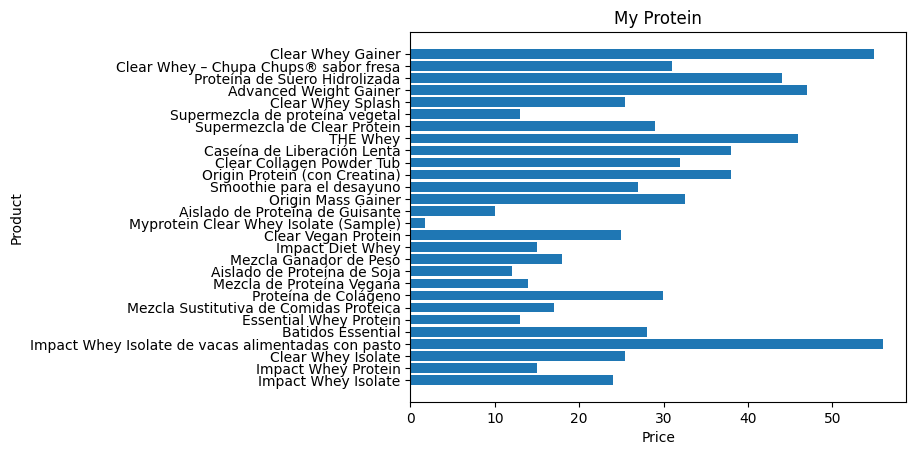

In [84]:
# Creating chart
plt.barh(df["Product"], df["Price"])
plt.xlabel("Price")
plt.ylabel("Product")
plt.title("My Protein")
plt.show()